In [45]:
# Import necessary libraries
from pathlib import Path 
import pandas as pd 
import polars as pl
import tarfile 
import urllib.request
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.datasets import fetch_california_housing
from scipy import stats
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

In [2]:
# URL
url = "https://github.com/ageron/data/raw/main/housing.tgz"

In [3]:
# Function to load housing data
def load_housing_data(engine = 'pd'):
    datasets_dir = Path("datasets")
    tarball_path = datasets_dir / "housing.tgz"
    csv_path = datasets_dir / "housing" / "housing.csv"

    if not tarball_path.exists():
        datasets_dir.mkdir(parents=True, exist_ok=True)
        
        urllib.request.urlretrieve(url, tarball_path)

        with tarfile.open(tarball_path) as tar:
            tar.extractall(path=datasets_dir, filter="data")

    if engine == 'pl':
        return pl.read_csv(csv_path)
    elif engine == 'pd':
        return pd.read_csv(csv_path)
    else:
        raise ValueError("Invalid engine. Use 'pl' for Polars or 'pd' for Pandas.")

In [4]:
housing_pd = load_housing_data()
housing_pd.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
housing_pl = load_housing_data('pl')
housing_pl.head()

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
f64,f64,f64,f64,f64,f64,f64,f64,f64,str
-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,"""NEAR BAY"""
-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,"""NEAR BAY"""
-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,"""NEAR BAY"""
-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,"""NEAR BAY"""
-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,"""NEAR BAY"""


# Method .head()

## Pandas

In [6]:
housing_pd.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Polars

In [7]:
housing_pl.head()

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
f64,f64,f64,f64,f64,f64,f64,f64,f64,str
-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,"""NEAR BAY"""
-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,"""NEAR BAY"""
-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,"""NEAR BAY"""
-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,"""NEAR BAY"""
-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,"""NEAR BAY"""


## .info Method in Pandas

In [8]:
housing_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


## Metodo .glimpse and null_count en Polars

In [9]:
housing_pl.glimpse()

Rows: 20640
Columns: 10
$ longitude          <f64> -122.23, -122.22, -122.24, -122.25, -122.25, -122.25, -122.25, -122.25, -122.26, -122.25
$ latitude           <f64> 37.88, 37.86, 37.85, 37.85, 37.85, 37.85, 37.84, 37.84, 37.84, 37.84
$ housing_median_age <f64> 41.0, 21.0, 52.0, 52.0, 52.0, 52.0, 52.0, 52.0, 42.0, 52.0
$ total_rooms        <f64> 880.0, 7099.0, 1467.0, 1274.0, 1627.0, 919.0, 2535.0, 3104.0, 2555.0, 3549.0
$ total_bedrooms     <f64> 129.0, 1106.0, 190.0, 235.0, 280.0, 213.0, 489.0, 687.0, 665.0, 707.0
$ population         <f64> 322.0, 2401.0, 496.0, 558.0, 565.0, 413.0, 1094.0, 1157.0, 1206.0, 1551.0
$ households         <f64> 126.0, 1138.0, 177.0, 219.0, 259.0, 193.0, 514.0, 647.0, 595.0, 714.0
$ median_income      <f64> 8.3252, 8.3014, 7.2574, 5.6431, 3.8462, 4.0368, 3.6591, 3.12, 2.0804, 3.6912
$ median_house_value <f64> 452600.0, 358500.0, 352100.0, 341300.0, 342200.0, 269700.0, 299200.0, 241400.0, 226700.0, 261100.0
$ ocean_proximity    <str> 'NEAR BAY', 'NEAR BAY'

In [10]:
housing_pl.null_count()

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,207,0,0,0,0,0


## Pandas 

In [11]:
# Check the distribution of the "ocean_proximity" column
housing_pd["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [12]:
# Describe the dataset
housing_pd.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Histogram

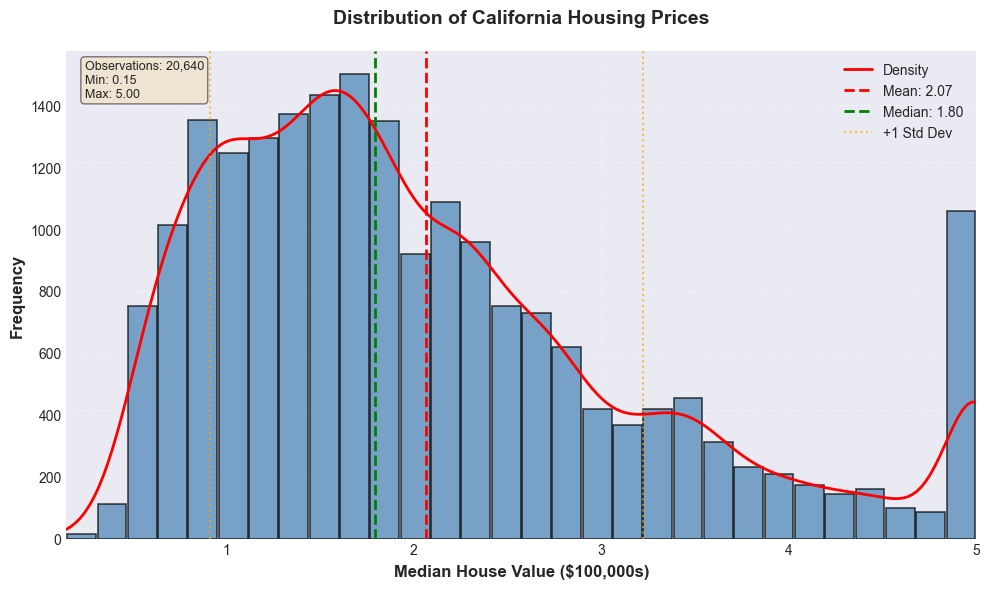

In [13]:
# Load California housing dataset as a pandas DataFrame
housing = fetch_california_housing(as_frame=True)
housing_pd = housing.frame

# The target variable is MedHouseVal (median house value in $100,000s)
prices = housing_pd["MedHouseVal"]

# Set style for a more professional look
plt.style.use('seaborn-v0_8-darkgrid')  # Modern style

# Create figure with better size
fig, ax = plt.subplots(figsize=(10, 6))

# Create enhanced histogram
n, bins, patches = ax.hist(prices, 
                        bins=30, 
                        edgecolor='black',  # Black borders
                        linewidth=1.2,
                        alpha=0.7,  # Transparency
                        color='steelblue',  # More pleasant color
                        rwidth=0.95)  # Gap between bars

# Add density line (approximate KDE)
density = stats.gaussian_kde(prices)
x_range = np.linspace(prices.min(), prices.max(), 200)
ax.plot(x_range, density(x_range) * len(prices) * (bins[1]-bins[0]), 
        'r-', linewidth=2, label='Density')

# Customize axes with better formatting
ax.set_xlabel("Median House Value ($100,000s)", 
                fontsize=12, fontweight='bold')
ax.set_ylabel("Frequency", fontsize=12, fontweight='bold')
ax.set_title("Distribution of California Housing Prices", 
                fontsize=14, fontweight='bold', pad=20)

# Add grid for better readability
ax.grid(True, alpha=0.3, linestyle='--')

# Add descriptive statistics
mean_price = prices.mean()
median_price = prices.median()
std_price = prices.std()

ax.axvline(mean_price, color='red', linestyle='--', 
        linewidth=2, label=f'Mean: {mean_price:.2f}')
ax.axvline(median_price, color='green', linestyle='--', 
        linewidth=2, label=f'Median: {median_price:.2f}')
ax.axvline(mean_price + std_price, color='orange', linestyle=':', 
        linewidth=1.5, alpha=0.7, label=f'+1 Std Dev')
ax.axvline(mean_price - std_price, color='orange', linestyle=':', 
        linewidth=1.5, alpha=0.7)

# Add legend
ax.legend(loc='upper right', fontsize=10, framealpha=0.9)

# Add text box with additional information
stats_text = f'Observations: {len(prices):,}\nMin: {prices.min():.2f}\nMax: {prices.max():.2f}'
ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, 
        fontsize=9, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

# Improve axis formatting
ax.tick_params(axis='both', which='major', labelsize=10)
ax.set_xlim(prices.min(), prices.max())

# Adjust layout to prevent cutting off
plt.tight_layout()

# Show plot
plt.show()

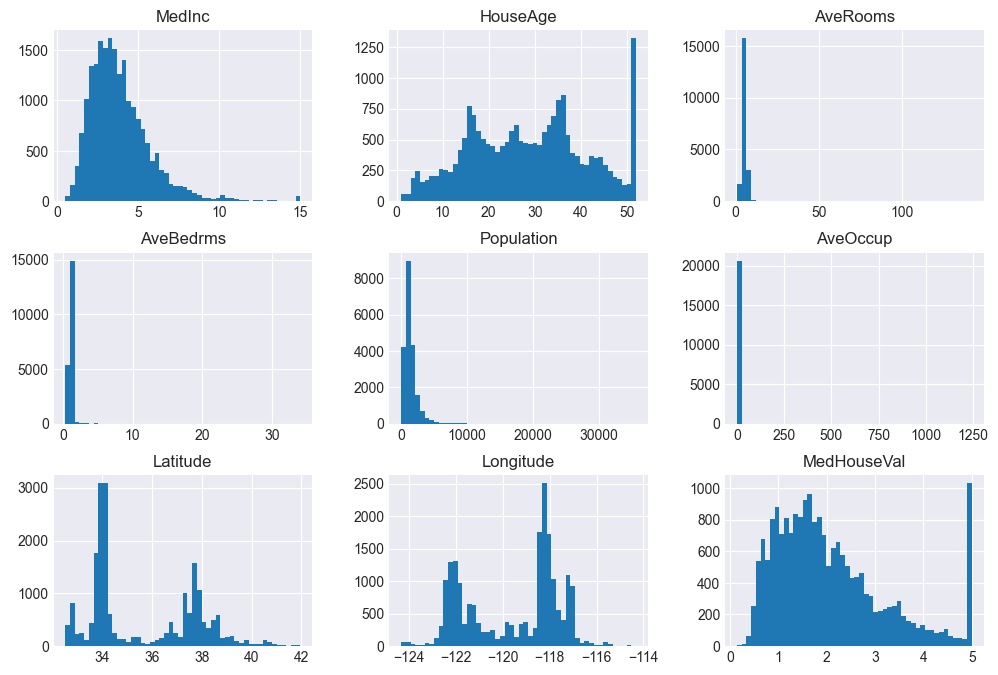

In [14]:
housing_pd.hist(bins=50, figsize=(12, 8))
plt.show()

# Random mix

In [15]:
def shuffle_and_split_data(data, test_ratio, rng):
    # Generates a random permutation
    # rng is a random number generator (for eg, np.random.default_rng(seed))
    shuffled_indices = rng.permutation(len(data)) # [4, 2, 3, 1]

    # Calculate how many rows will go to the test set
    test_set_size = int(len(data) * test_ratio) # 1000 * 0.2 = 200

    # Take the first (already mixed) indices for the test set
    indexes_test = shuffled_indices[:test_set_size] # 0 : 200 = %20

    # The remaining indices will be for the train set
    train_indexes = shuffled_indices[test_set_size:] # 200 : 1000 = %80

    # Returns two subsets using iloc (positional indexing)
    # First the train, then the test
    return data.iloc[train_indexes], data.iloc[indexes_test]

In [16]:
# Generate a random number generator with a fixed seed for reproducibility
rng = np.random.default_rng(seed=42)

In [17]:
train_set , test_set = shuffle_and_split_data(housing_pd, 0.2, rng)

In [18]:
len(train_set), len(test_set)

(16512, 4128)

In [19]:
train_set.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
18731,3.0954,19.0,5.085366,1.031165,1952.0,2.644986,40.55,-122.41,0.865
3002,2.5960,23.0,5.247845,1.039871,2717.0,2.927802,35.32,-119.01,0.700
19844,2.0000,17.0,4.022936,1.004587,966.0,4.431193,36.42,-119.09,0.525
4939,1.9531,30.0,4.097561,1.138211,529.0,4.300813,33.99,-118.27,1.000
1674,2.3103,47.0,4.529570,1.088710,835.0,2.244624,38.04,-122.27,1.345


# Split by hash of the identifier

In [20]:
# Import necessary libraries
from zlib import crc32
import numpy as np

In [21]:
def is_id_in_test_set(id, radio_test):
    return crc32(np.int64(id)) < radio_test * 2 **32

# `crc32(...)`
Produces an integer in the range:
$[0, 2^{32} - 1 ] = [0, 4.294.967.295]$

In [22]:
crc32(np.int64(1))

2844319735

In [23]:
crc32(np.int64(2))

654825492

In [24]:
crc32(np.int64(3))

3954038922

# Sckit Learn 

In [25]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing_pd, test_size=0.2, random_state=42)

In [26]:
len(train_set), len(test_set)

(16512, 4128)

## Creating categories with Pandas

In [28]:
housing_pd['income_cat'] = pd.cut(
    housing_pd['MedInc'],
    bins=[0. , 1.5, 3.0, 4.5, 6.0, np.inf],
    labels=[1, 2, 3, 4, 5]
)
housing_pd.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,income_cat
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,5
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,5
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,5
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,4
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,3


## Creating categories with Polars

In [32]:
housing_pl = housing_pl.with_columns(
    pl.col('median_income').cut(
        breaks=[1.5, 3.0, 4.5, 6.0],
        labels = ["1", "2", "3", "4", "5"]
    ).alias('income_cat')
)
housing_pl.head()

longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
f64,f64,f64,f64,f64,f64,f64,f64,f64,str,cat
-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,"""NEAR BAY""","""5"""
-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,"""NEAR BAY""","""5"""
-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,"""NEAR BAY""","""5"""
-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,"""NEAR BAY""","""4"""
-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,"""NEAR BAY""","""3"""


## Histogram

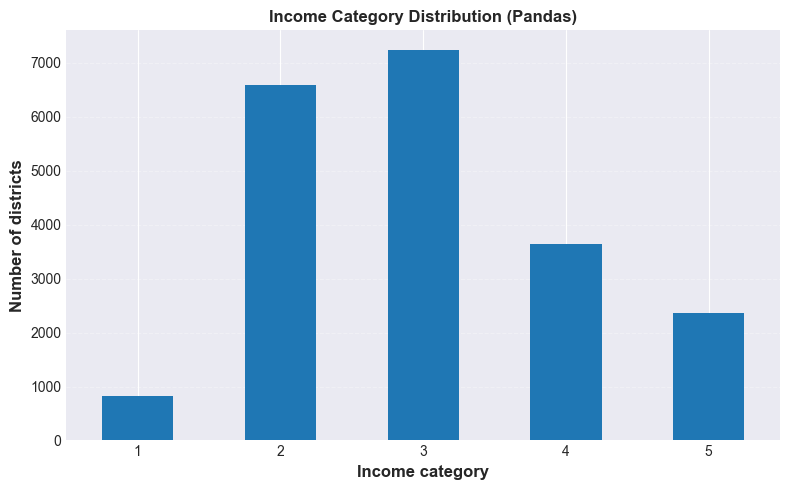

In [41]:
cat_counts_pd = housing_pd["income_cat"].value_counts().sort_index()
fig, ax = plt.subplots(figsize=(8, 5))
cat_counts_pd.plot.bar(ax=ax, rot=0)

ax.set_xlabel("Income category", fontsize=12, fontweight='bold')
ax.set_ylabel("Number of districts", fontsize=12, fontweight='bold')
ax.set_title("Income Category Distribution (Pandas)", fontweight='bold')

# 👇 Divide the Y-axis by 1000 increments
ax.yaxis.set_major_locator(ticker.MultipleLocator(1000))

ax.grid(True, axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_11880\392274024.py:5: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  .count()                         # Count rows per category


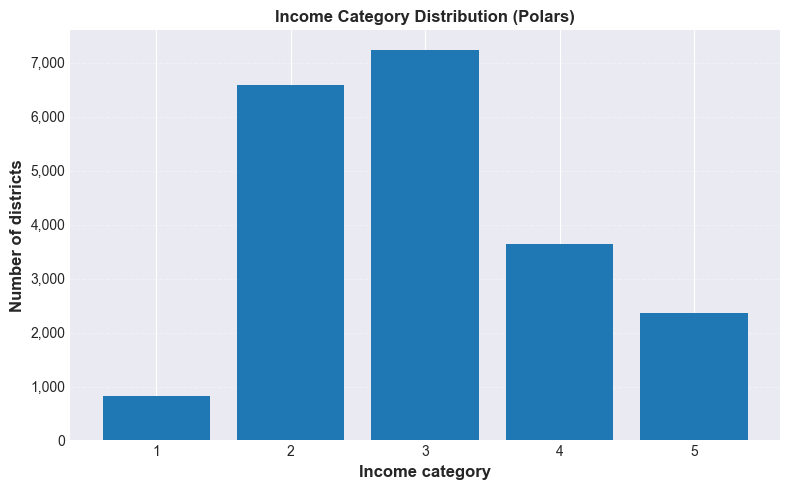

In [44]:
# Group by income category and count number of districts
cat_counts_pl = (
    housing_pl.group_by("income_cat")
    .count()
    .sort("income_cat")
)

# Convert to pandas for plotting with matplotlib
cat_counts_pl_pd = cat_counts_pl.to_pandas()

# Create figure
fig, ax = plt.subplots(figsize=(8, 5))

# Create bar chart
ax.bar(cat_counts_pl_pd["income_cat"], 
    cat_counts_pl_pd["count"])

# Axis labels and title
ax.set_xlabel("Income category", fontsize=12, fontweight="bold")
ax.set_ylabel("Number of districts", fontsize=12, fontweight="bold")
ax.set_title("Income Category Distribution (Polars)", fontweight="bold")

# Set Y-axis ticks every 1000 units
ax.yaxis.set_major_locator(ticker.MultipleLocator(1000))

# Format Y-axis with thousand separators (optional but cleaner)
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

# Add horizontal grid lines
ax.grid(True, axis="y", linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()

## StrafitiedShufflesplit

In [46]:
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=42)

strat_splits = []

for train_index, test_index in splitter.split(housing_pd, housing_pd["income_cat"]):
    strat_train_set_n = housing_pd.iloc[train_index]
    strat_test_set_n = housing_pd.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [47]:
strat_train_set, strat_test_set = strat_splits[0]

## train_test_split

In [49]:
strat_train_set, strat_test_set = train_test_split(
    housing_pd, test_size=0.2, stratify=housing_pd["income_cat"],
    random_state=42
)

strat_test_set["income_cat"].value_counts() / len(strat_test_set)

income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [51]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

## EDA (Exploratory Data Analysis)

## Explore and Visualize

In [52]:
housing = strat_train_set.copy()

In [54]:
strat_train_set.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
12655,2.1736,29.0,5.485836,1.128895,2237.0,3.168555,38.52,-121.46,0.721
15502,6.3373,7.0,6.927083,1.113281,2015.0,2.623698,33.09,-117.23,2.796
2908,2.8750,44.0,5.393333,1.033333,667.0,2.223333,35.37,-119.04,0.827
14053,2.2264,24.0,3.886128,1.074534,898.0,1.859213,32.75,-117.13,1.125
20496,4.4964,27.0,6.096552,1.113793,1837.0,3.167241,34.28,-118.70,2.383


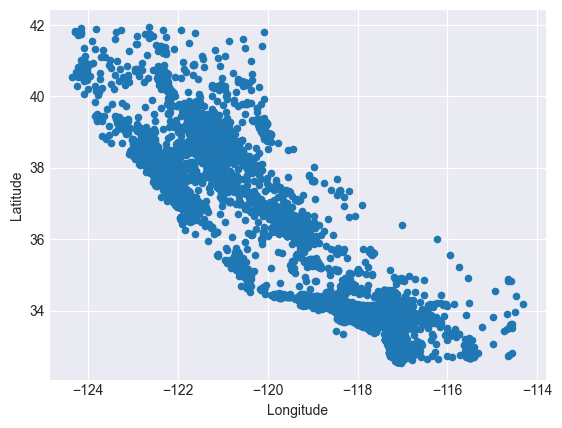

In [55]:
housing.plot(kind="scatter", x="Longitude", y="Latitude", grid=True)
plt.show()

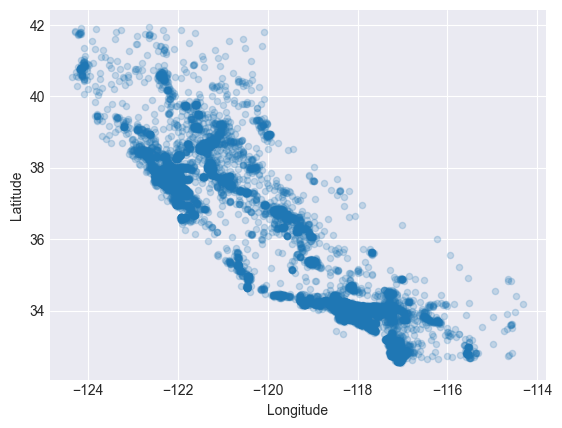

In [56]:
housing.plot(kind="scatter", x="Longitude", y="Latitude", grid=True, alpha=0.2)
plt.show()

## Additional information

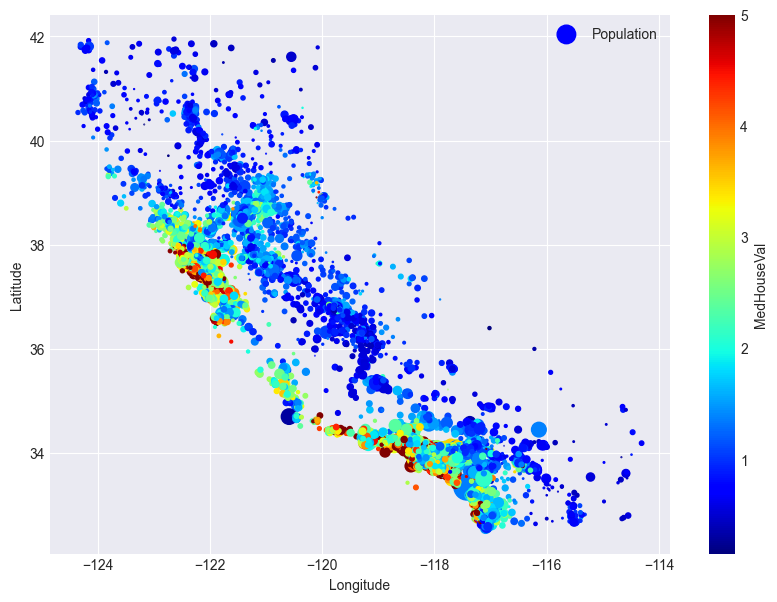

In [57]:
housing.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
            s = housing["Population"] / 100, label="Population",
            c = "MedHouseVal", cmap="jet", colorbar=True,
            legend=True, sharex=False, figsize=(10,7))
plt.show()